## Auto Encoder
- https://ardino.tistory.com/category/%E3%80%908%E3%80%91%EC%B5%9C%EA%B7%BC%20AutoEncoder%20%EC%9D%91%EC%9A%A9%20%EB%AA%A8%EB%8D%B8%20%EC%9D%B4%ED%95%B4%ED%95%98%EA%B3%A0%20%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0

## MNIST & Fashion MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.keras as kr

## MNIST 숫자

### 입력 데이터

In [3]:
from tensorflow.keras.datasets import mnist

- load

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


- 전처리
    - 정규화 : 0 ~ 1
    - 차원 변환 : 2차원(28, 28) --> 1차원(784)
    - 형 변환 : float형
      - astype(copy=False) : 사본 생성을 하지 마라
      - https://wikidocs.net/151412

In [5]:
X_train, X_test = X_train / 255., X_test / 255.
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

In [6]:
X_train = X_train.astype(np.float32, copy=False)
X_test = X_test.astype(np.float32, copy=False)

### Model 정의
- 인공신경망에 사용될 파라미터 값들을 설정

- MNIST Dataset
   - image shape : (28*28) ==> 1차원으로 변환 (features)

In [7]:
num_features = 784

- Network Parameters
    - 은닉층(hidden layer) 설계
        - 계층 수
        - 각 계층 내 뉴런(노드)의 수

In [8]:
hidden_1 = 128
hidden_2 = 64

### Model 설계
    - input /
    - encoder <-- input
    - decoder <-- latent(encoder 출력)
    - output  <-- decoder(encoder(input))
    - 최종 모델 : (input, output)

- Encoder 모델 정의

In [9]:
inputs = kr.Input(shape=(num_features, ))

encoder = kr.layers.Dense(hidden_1, activation='sigmoid')(inputs)
encoder = kr.layers.Dense(hidden_2, activation='sigmoid')(encoder)

encoder_model = kr.Model(inputs, encoder, name='encoder')
encoder_model.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


- Decoder 모델 정의

In [10]:
latent_dim = kr.Input(shape=(hidden_2, ))

decoder = kr.layers.Dense(hidden_1, activation='sigmoid')(latent_dim)
decoder = kr.layers.Dense(num_features, activation='sigmoid')(decoder)

decoder_model = kr.Model(latent_dim, decoder, name='decoder')
decoder_model.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 109,456
Trainable params: 109,456
Non-trainable params: 0
_________________________________________________________________


- 최종 통합 모델(Auto Encoder) 정의

In [11]:
outputs = decoder_model(encoder_model(inputs))

mnist_model = kr.Model(inputs, outputs )

mnist_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 encoder (Functional)        (None, 64)                108736    
                                                                 
 decoder (Functional)        (None, 784)               109456    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


### Model Compile
    - 최적화 방법(Optimizer)
    - 손실 함수(Loss funtion)

In [12]:
mnist_model.compile(optimizer='adam', loss='mse')

### Model 훈련

In [14]:
batch_size = 128
epochs = 50

In [15]:
mnist_model.fit(x=X_train, y=X_train, batch_size=batch_size, shuffle=False, epochs=epochs)

Epoch 1/50
469/469 [==============================] - 5s 8ms/step - loss: 0.0704
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0584
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0469
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0393
Epoch 5/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0358
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0320
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0289
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0264
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0241
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0221
Epoch 11/50
469/469 [==============================] - 4s 7ms/step - loss: 0.0206
Epoch 12/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0194
Epoch 13/50
469/469 [=

### Model 평가(test 데이터)

In [16]:
y_true = X_test[:10]
y_pred = mnist_model.predict(y_true)

1/1 [==============================] - 0s 93ms/step


### 결과 출력

- 출력 : 입력 데이터(2차원), 출력 데이터(예측 결과)
    - 데이터 변환 : 1차원 데이터 --> 2차원 data 변환 ==> image로 출력
    - image 입출력
        - imread(), imshow()
    - aspect : 가로/세로 비율, {'equal', 'auto'} or float

In [17]:
def plot_predictions(y_true, y_pred):
    f, ax = plt.subplots(2, 10, figsize=(15, 4))

    for i in range(10):
        ax[0][i].imshow(np.reshape(y_true[i], (28, 28)), aspect='auto')
        ax[1][i].imshow(np.reshape(y_pred[i], (28, 28)), aspect='auto')
    plt.tight_layout()

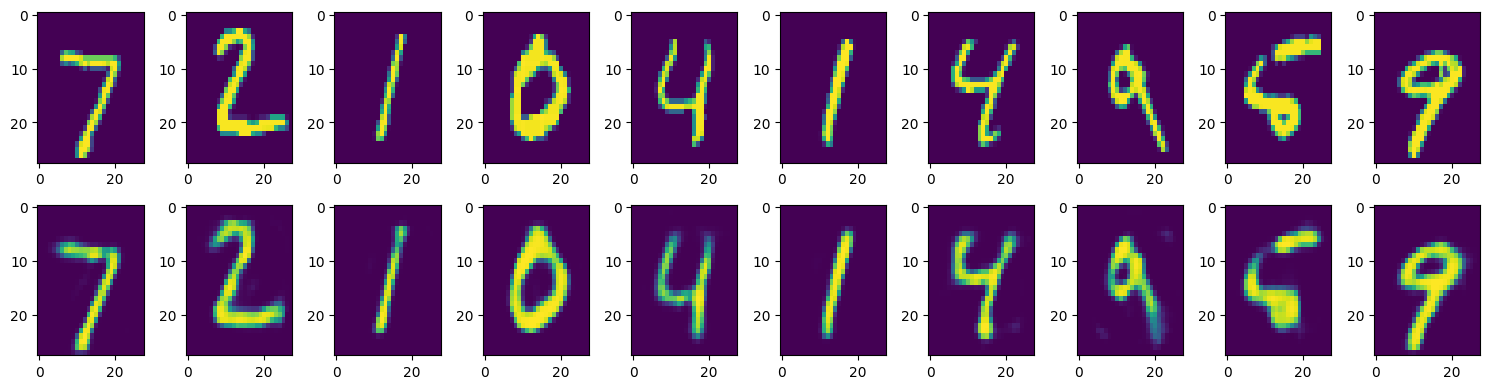

In [18]:
plot_predictions(y_true, y_pred)

## Fashion MNIST

### 입력 데이터

In [19]:
from tensorflow.keras.datasets import fashion_mnist

- load

In [20]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- 전처리
    - 정규화 : 0 ~ 1
    - 차원 변환 : 2차원(28, 28) --> 1차원(784)
    - 형 변환 : float형

In [21]:
X_train, X_test = X_train / 255., X_test / 255.
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

In [22]:
X_train = X_train.astype(np.float32, copy=False)
X_test = X_test.astype(np.float32, copy=False)

### Model 설계
    - input /
    - encoder <-- input
    - decoder <-- latent(encoder 출력)
    - output  <-- decoder(encoder(input))
    - 최종 모델 : (input, output)

- Encoder 모델 정의

In [23]:
inputs = kr.Input(shape=(num_features, ))
encoder = kr.layers.Dense(hidden_1, activation='sigmoid')(inputs)
encoder = kr.layers.Dense(hidden_2, activation='sigmoid')(encoder)
encoder_model = kr.Model(inputs, encoder, name='encoder')
encoder_model.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


- Decoder 모델 정의

In [24]:
latent_dim = kr.Input(shape=(hidden_2, ))
decoder = kr.layers.Dense(hidden_1, activation='sigmoid')(latent_dim)
decoder = kr.layers.Dense(num_features, activation='sigmoid')(decoder)
decoder_model = kr.Model(latent_dim, decoder, name='decoder')
decoder_model.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 109,456
Trainable params: 109,456
Non-trainable params: 0
_________________________________________________________________


- 최종 통합 모델 정의

In [25]:
outputs = decoder_model(encoder_model(inputs))
fmnist_model = kr.Model(inputs, outputs )
fmnist_model.compile(optimizer='adam', loss='mse')
fmnist_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 encoder (Functional)        (None, 64)                108736    
                                                                 
 decoder (Functional)        (None, 784)               109456    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


### Model 훈련

In [26]:
batch_size = 128
epochs = 50

In [27]:
fmnist_model.fit(x=X_train, y=X_train, batch_size=batch_size, shuffle=False, epochs=epochs)

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0631
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0379
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0289
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0250
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0233
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0221
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0210
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0200
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0192
Epoch 10/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0184
Epoch 11/50
469/469 [==============================] - 4s 7ms/step - loss: 0.0178
Epoch 12/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0172
Epoch 13/50
469/469 [==

### Model 평가(테스트 데이터)

In [28]:
y_true = X_test[:10]
y_pred = fmnist_model.predict(y_true)

1/1 [==============================] - 0s 67ms/step


### 결과 출력

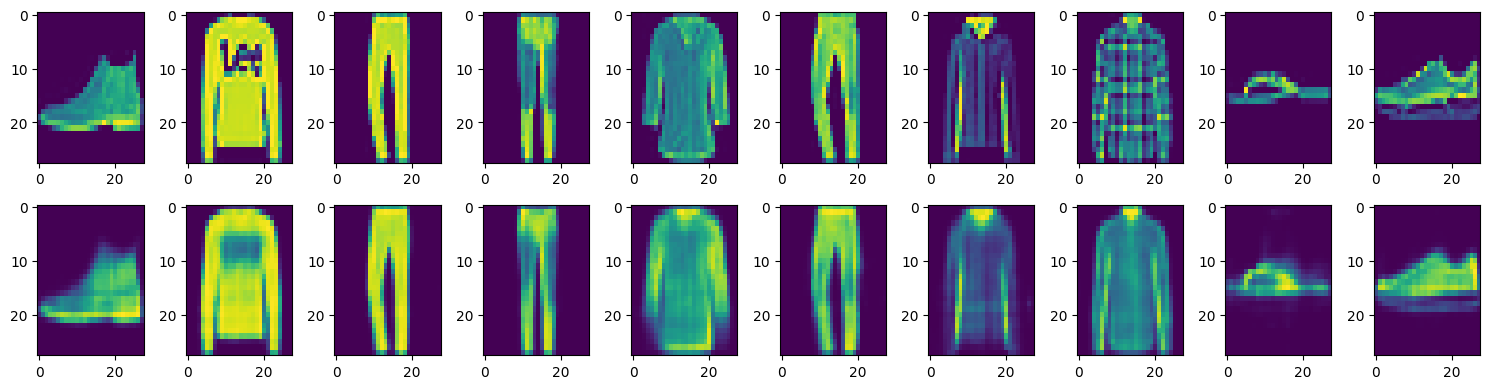

In [29]:
plot_predictions(y_true, y_pred)

# Exercise

In [ ]:
def load_data(choice='mnist', labels=False):
    if choice not in ['mnist', 'fashion_mnist']:
        raise ('Choices are mnist and fashion_mnist')

    if choice == 'mnist':
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
    else:
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

    X_train, X_test = X_train / 255., X_test / 255.
    X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])
    X_train = X_train.astype(np.float32, copy=False)
    X_test = X_test.astype(np.float32, copy=False)

    if labels:
        return (X_train, y_train), (X_test, y_test)

    return X_train, X_test

In [ ]:
X_train, X_test = load_data('mnist')

In [ ]:
X_train, X_test = load_data('fashion_mnist')

In [ ]:
def plot_digits(X, y, encoder, batch_size=128):
    """Plots labels and MNIST digits as function of 2D latent vector

    Parameters:
    ----------
    encoder: Model
        A Keras Model instance
    X: np.ndarray
        Test data
    y: np.ndarray
        Test data labels
    batch_size: int
        Prediction batch size
    """
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(X, batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y)
    plt.colorbar()
    plt.xlabel("z[0] Latent Dimension")
    plt.ylabel("z[1] Latent Dimension")
    plt.show()

In [ ]:
def generate_manifold(decoder):
    """Generates a manifold of MNIST digits from a random noisy data.

    Parameters:
    ----------
    decoder: Model
        A Keras Model instance
    """

    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))

    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)

    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0] Latent Dimension")
    plt.ylabel("z[1] Latent Dimension")
    plt.imshow(figure, cmap='Greys_r')
    plt.show()